# Import libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Get Data from Yahoo Finance

In [2]:
#Get gold price data from Yahoo Finance
gold_data = yf.Ticker("GC=F").history(period="10y")
gold_data.to_csv('Data/gold_price_data.csv')

In [3]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2015-10-02 00:00:00-04:00 to 2025-10-02 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2514 non-null   float64
 1   High          2514 non-null   float64
 2   Low           2514 non-null   float64
 3   Close         2514 non-null   float64
 4   Volume        2514 non-null   int64  
 5   Dividends     2514 non-null   float64
 6   Stock Splits  2514 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.1 KB


In [4]:
gold_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.0,2514.0
mean,1756.870127,1765.687709,1748.620207,1757.393157,5195.573986,0.0,0.0
std,564.494840,568.887104,560.989677,565.510262,28605.395149,0.0,0.0
min,1053.699951,1062.000000,1046.199951,1050.800049,0.000000,0.0,0.0
25%,1287.325043,1292.000000,1283.699982,1288.450012,51.000000,0.0,0.0
50%,1732.300049,1741.500000,1722.549988,1731.500000,202.000000,0.0,0.0
75%,1938.299957,1947.199951,1928.599976,1937.700043,621.750000,0.0,0.0
max,3892.699951,3903.600098,3877.000000,3901.100098,386334.000000,0.0,0.0


# Visualization

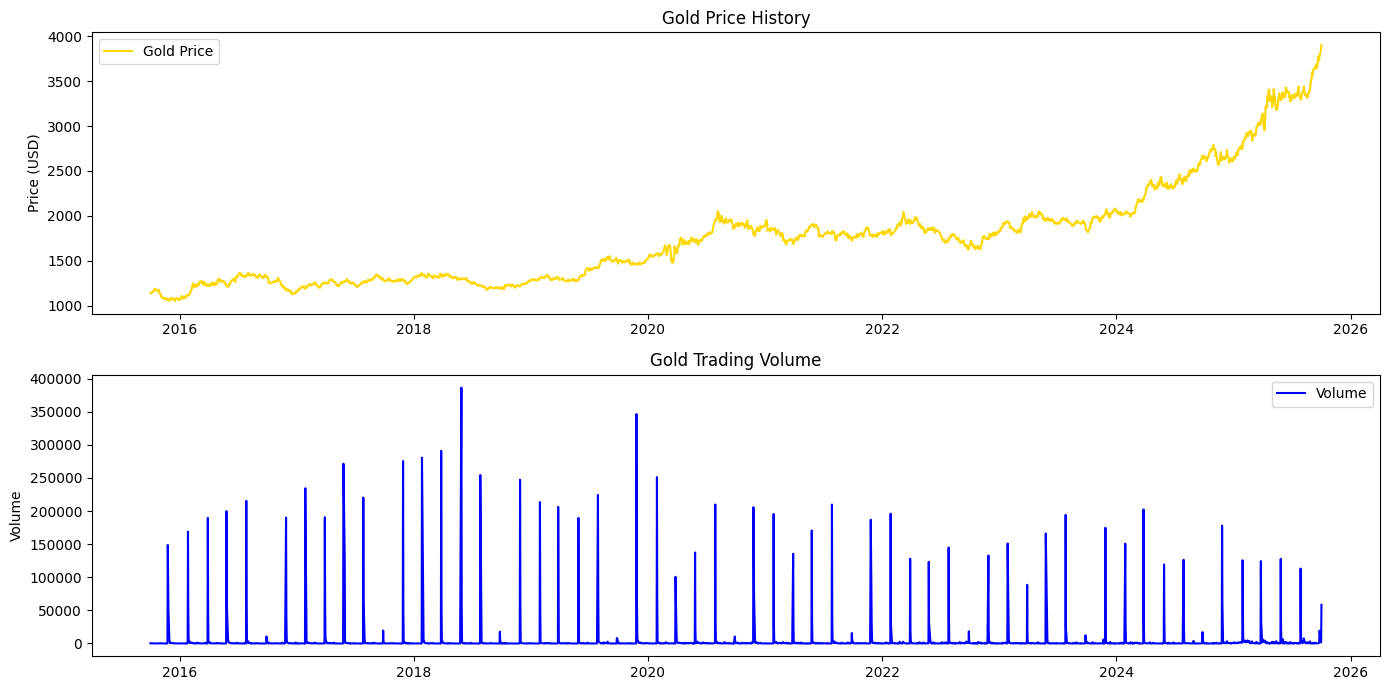

In [5]:
# Visualize the gold price data
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))
# Plot the closing price history
ax1.plot(gold_data.index, gold_data['Close'], label='Gold Price', color='gold')
# Plot the trading volume history
ax2.plot(gold_data.index, gold_data['Volume'], label='Volume', color='blue')
ax1.set_title('Gold Price History')
ax1.set_ylabel('Price (USD)')
ax2.set_title('Gold Trading Volume')
ax2.set_ylabel('Volume')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

From the charts above:
- From 2016 to 2018 and 2022 to 2024, volume increased. The peak was during the period from 2016 to 2018.
- After two years of increasing volume, the gold price started to grow (2019 to 2021 and 2024 to 2026).

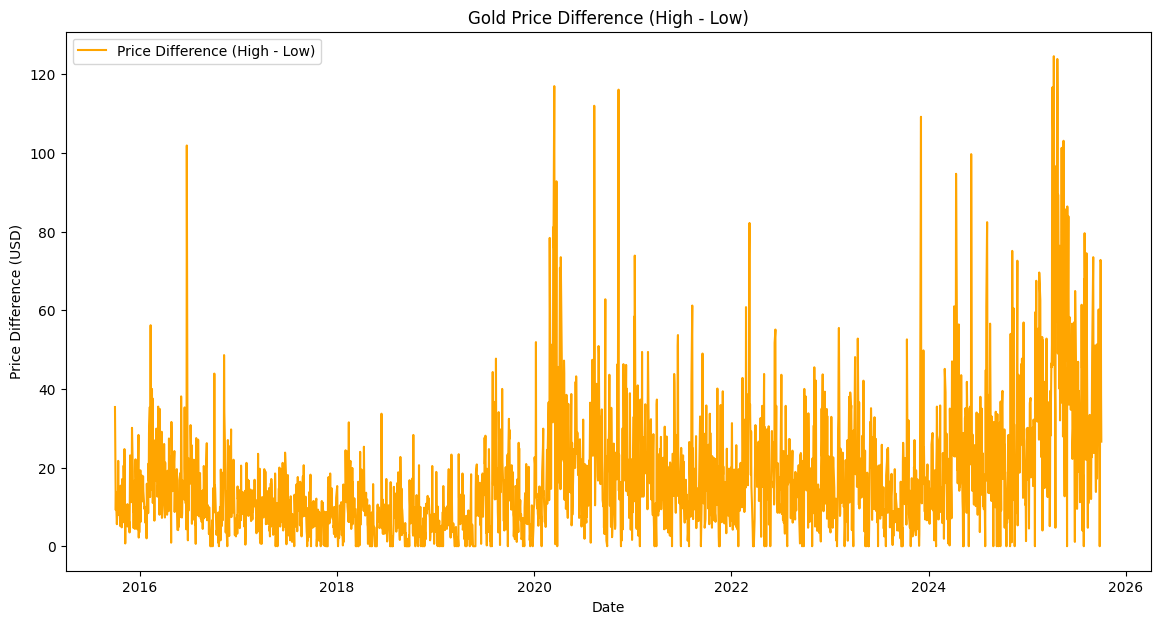

In [ ]:
# Plot High and Low prices difference
gold_data['Price_Diff'] = gold_data['High'] - gold_data['Low']
plt.figure(figsize=(14, 7))
plt.plot(gold_data.index, gold_data['Price_Diff'], label='Price Difference (High - Low)', color='orange')
plt.title('Gold Price Difference (High - Low)')
plt.ylabel('Price Difference (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

Based on the daily high–low difference from the chart above, we can observe that the gold price usually shows a large gap in a day at the start of an uptrend. In contrast, stable prices are often accompanied by small or medium gaps. Therefore, the market tends to be volatile when it begins to rise, and more stable when it does not.

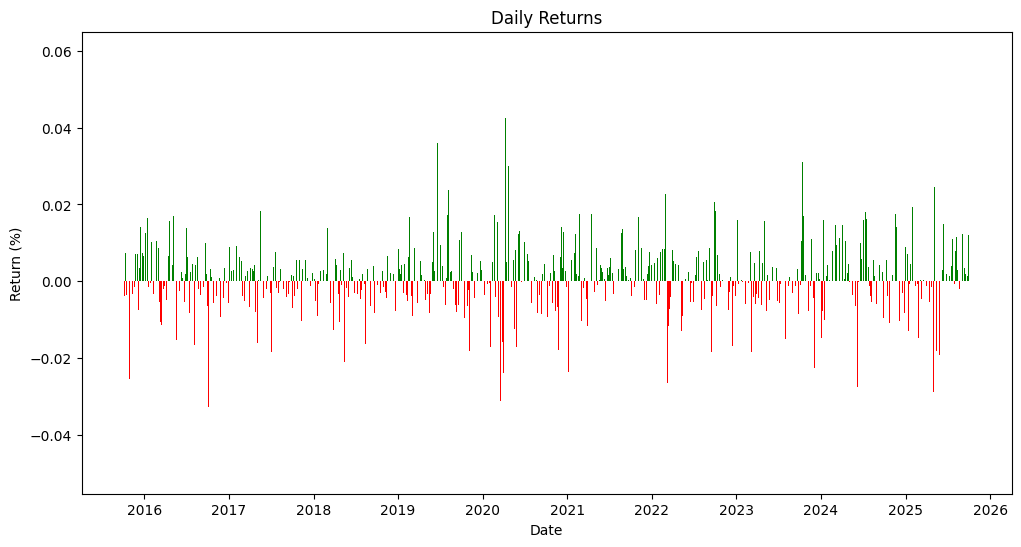

In [7]:
# Calculate daily returns
gold_data['Daily_Return'] = gold_data['Close'].pct_change()
returns = gold_data['Daily_Return']

# Set colors: green for >=0, red for <0
colors = ['green' if val >= 0 else 'red' for val in returns]

plt.figure(figsize=(12,6))
plt.bar(gold_data.index, returns, color=colors)

plt.title("Daily Returns")
plt.ylabel("Return (%)")
plt.xlabel("Date")
plt.show()

Daily Returns:
Daily return is the percentage change in the price of an asset from one day to the next.
It shows how much you would gain or lose in one day if you held the asset during that period.

Daily Return Formula
$$
\text{Daily Return} = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100\%
$$

Log Return Formula
$$
\text{Log Return} = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

- \( P_t \): Price of the asset at time \( t \) (today’s price)  
- \( P_{t-1} \): Price of the asset at time \( t-1 \) (yesterday’s price)  
- Daily Return: Percentage change in price from one day to the next  
- Log Return: Natural logarithm of the ratio of today’s price to yesterday’s price (useful for continuous compounding and time-series analysis)

From the previous chart, we can see that the highest and longest positive daily return (at the start of 2020) coincided with the period when the gold price began to rise and became volatile.